In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
!dir


 Volume in drive C has no label.
 Volume Serial Number is 8427-1372

 Directory of C:\Users\admin_guest

03/25/2020  12:23 PM    <DIR>          .
03/25/2020  12:23 PM    <DIR>          ..
12/15/2019  01:38 PM    <DIR>          .anaconda
01/28/2020  09:49 PM                59 .bash_history
02/18/2020  03:51 AM            20,438 .boto
03/25/2020  12:24 PM    <DIR>          .conda
03/25/2020  12:06 PM                43 .condarc
12/15/2019  01:39 PM    <DIR>          .config
02/18/2020  03:51 AM    <DIR>          .gsutil
02/19/2020  03:55 PM    <DIR>          .Icecream Screen Recorder
01/06/2020  04:56 AM    <DIR>          .idlerc
03/25/2020  12:07 PM    <DIR>          .ipynb_checkpoints
12/15/2019  01:39 PM    <DIR>          .ipython
02/15/2020  02:07 PM    <DIR>          .jupyter
02/09/2020  08:56 PM    <DIR>          .kaggle
12/23/2019  04:39 PM    <DIR>          .keras
12/15/2019  01:39 PM    <DIR>          .matplotlib
02/25/2020  07:08 PM    <DIR>          .pylint.d
02/10/2020  11:11 

In [8]:
root_path = 'documents\comm_use_subset'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file
0,NaN,Elsevier,Intrauterine virus infections and congenital h...,10.1016/0002-8703(72)90077-4,NaN,4361535,els-covid,Abstract The etiologic basis for the vast majo...,1972-12-31,"Overall, James C.",American Heart Journal,NaN,NaN,False,custom_license
1,NaN,Elsevier,Coronaviruses in Balkan nephritis,10.1016/0002-8703(80)90355-5,NaN,6243850,els-covid,NaN,1980-03-31,"Georgescu, Leonida; Diosi, Peter; Buţiu, Ioan;...",American Heart Journal,NaN,NaN,False,custom_license
2,NaN,Elsevier,Cigarette smoking and coronary heart disease: ...,10.1016/0002-8703(80)90356-7,NaN,7355701,els-covid,NaN,1980-03-31,"Friedman, Gary D",American Heart Journal,NaN,NaN,False,custom_license
3,aecbc613ebdab36753235197ffb4f35734b5ca63,Elsevier,Clinical and immunologic studies in identical ...,10.1016/0002-9343(73)90176-9,NaN,4579077,els-covid,"Abstract Middle-aged female identical twins, o...",1973-08-31,"Brunner, Carolyn M.; Horwitz, David A.; Shann,...",The American Journal of Medicine,NaN,NaN,True,custom_license
4,NaN,Elsevier,Epidemiology of community-acquired respiratory...,10.1016/0002-9343(85)90361-4,NaN,4014285,els-covid,Abstract Upper respiratory tract infections ar...,1985-06-28,"Garibaldi, Richard A.",The American Journal of Medicine,NaN,NaN,False,custom_license


In [9]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44220 entries, 0 to 44219
Data columns (total 15 columns):
sha                            28462 non-null object
source_x                       44220 non-null object
title                          43996 non-null object
doi                            40750 non-null object
pmcid                          23319 non-null object
pubmed_id                      22943 non-null object
license                        44220 non-null object
abstract                       35806 non-null object
publish_time                   34197 non-null object
authors                        41074 non-null object
journal                        33173 non-null object
Microsoft Academic Paper ID    964 non-null object
WHO #Covidence                 1767 non-null object
has_full_text                  44220 non-null bool
full_text_file                 32829 non-null object
dtypes: bool(1), object(14)
memory usage: 4.8+ MB


In [15]:
all_json = glob.glob('documents\comm_use_subset\*.json', recursive=True)
len(all_json)

9118

In [16]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

000b7d1517ceebb34e1e3e817695b6de03e2fa78: ... - Figure S1 : Phylogeny of all sequences belonging to the UMRV phylogroup. - Table S4 : Bats cytochrome b sequences data set. -Table S5 : Test of host-parasite co-evolution using global fit methods Pa...


In [17]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [20]:
dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['paper_id'].append(content.paper_id)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 300 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # more than 2 authors, may be problem when plotting, so take first 2 append with ...
            dict_['authors'].append(". ".join(authors[:2]) + "...")
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 9118
Processing index: 911 of 9118
Processing index: 1822 of 9118
Processing index: 2733 of 9118
Processing index: 3644 of 9118
Processing index: 4555 of 9118
Processing index: 5466 of 9118
Processing index: 6377 of 9118
Processing index: 7288 of 9118
Processing index: 8199 of 9118
Processing index: 9110 of 9118


,paper_id,abstract,body_text,authors,title,journal,abstract_summary
0,00142f93c18b07350be89e96372d240372437ed9,Dendritic cells (DCs) are specialized antigen-...,iNTRODUCTiON Human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...
1,0022796bb2112abd2e6423ba2d57751db06049fb,Dengue has a negative impact in low-and lower ...,Pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A....",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...
2,00326efcca0852dc6e39dc6b7786267e1bc4f194,"Fifteen years ago, United Nations world leader...",In addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R....",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le..."
3,00352a58c8766861effed18a4b079d1683fec2ec,Posttranslational modification of proteins by ...,Ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L....",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...
4,0043d044273b8eb1585d3a66061e9b4e03edc062,Background: Tuberculosis is a devastating dise...,The Ministry of Health of the People's Republi...,"Yang, Yu Rong. McManus, Donald P...",Evaluation of the tuberculosis programme in<b...,BMC Public Health,Background: Tuberculosis is a devastating<br>...


In [21]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
0,00142f93c18b07350be89e96372d240372437ed9,Dendritic cells (DCs) are specialized antigen-...,iNTRODUCTiON Human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...,309,5305
1,0022796bb2112abd2e6423ba2d57751db06049fb,Dengue has a negative impact in low-and lower ...,Pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A....",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...,276,7288
2,00326efcca0852dc6e39dc6b7786267e1bc4f194,"Fifteen years ago, United Nations world leader...",In addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R....",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le...",151,7593
3,00352a58c8766861effed18a4b079d1683fec2ec,Posttranslational modification of proteins by ...,Ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L....",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...,148,3156
4,0043d044273b8eb1585d3a66061e9b4e03edc062,Background: Tuberculosis is a devastating dise...,The Ministry of Health of the People's Republi...,"Yang, Yu Rong. McManus, Donald P...",Evaluation of the tuberculosis programme in<b...,BMC Public Health,Background: Tuberculosis is a devastating<br>...,264,3178


In [22]:
dict_ = None

In [23]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
0,00142f93c18b07350be89e96372d240372437ed9,Dendritic cells (DCs) are specialized antigen-...,iNTRODUCTiON Human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...,309,5305
1,0022796bb2112abd2e6423ba2d57751db06049fb,Dengue has a negative impact in low-and lower ...,Pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A....",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...,276,7288
2,00326efcca0852dc6e39dc6b7786267e1bc4f194,"Fifteen years ago, United Nations world leader...",In addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R....",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le...",151,7593
3,00352a58c8766861effed18a4b079d1683fec2ec,Posttranslational modification of proteins by ...,Ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L....",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...,148,3156
4,0043d044273b8eb1585d3a66061e9b4e03edc062,Background: Tuberculosis is a devastating dise...,The Ministry of Health of the People's Republi...,"Yang, Yu Rong. McManus, Donald P...",Evaluation of the tuberculosis programme in<b...,BMC Public Health,Background: Tuberculosis is a devastating<br>...,264,3178


In [24]:
df_covid['abstract'].describe(include='all')

count     8320
unique    7722
top           
freq       595
Name: abstract, dtype: object

In [25]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     8319
unique    7722
top           
freq       594
Name: abstract, dtype: object

In [26]:
df_covid['body_text'].describe(include='all')

count                                                  8319
unique                                                 8319
top       With the development of modern intensive swine...
freq                                                      1
Name: body_text, dtype: object

In [27]:
df_covid.describe()

,abstract_word_count,body_word_count
count,8319.000000,8319.000000
mean,240.495011,4623.074408
std,178.273941,3493.924000
min,0.000000,5.000000
25%,161.000000,3053.500000
50%,222.000000,4175.000000
75%,290.000000,5714.000000
max,3694.000000,171948.000000


In [28]:
df_covid.dropna(inplace=True)
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8293 entries, 0 to 8319
Data columns (total 9 columns):
paper_id               8293 non-null object
abstract               8293 non-null object
body_text              8293 non-null object
authors                8293 non-null object
title                  8293 non-null object
journal                8293 non-null object
abstract_summary       8293 non-null object
abstract_word_count    8293 non-null int64
body_word_count        8293 non-null int64
dtypes: int64(2), object(7)
memory usage: 647.9+ KB


In [29]:
df_covid = df_covid.head(12500)

In [30]:
import re

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [31]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [32]:
df_covid.head(4)

,paper_id,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count
0,00142f93c18b07350be89e96372d240372437ed9,dendritic cells dcs are specialized antigenpre...,introduction human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...,309,5305
1,0022796bb2112abd2e6423ba2d57751db06049fb,dengue has a negative impact in lowand lower m...,pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A....",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...,276,7288
2,00326efcca0852dc6e39dc6b7786267e1bc4f194,fifteen years ago united nations world leaders...,in addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R....",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le...",151,7593
3,00352a58c8766861effed18a4b079d1683fec2ec,posttranslational modification of proteins by ...,ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L....",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...,148,3156


In [33]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)

In [34]:
text_arr = text.stack().tolist()
len(text_arr)

8293

In [35]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [36]:
print(words[0][:10])

['introduction', 'human', 'beings', 'are', 'constantly', 'exposed', 'to', 'a', 'myriad', 'of']


In [37]:
n_gram_all = []

for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [38]:
n_gram_all[0][:10]

['introductionhuman',
 'humanbeings',
 'beingsare',
 'areconstantly',
 'constantlyexposed',
 'exposedto',
 'toa',
 'amyriad',
 'myriadof',
 'ofpathogens']

In [39]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [40]:
X.shape

(8293, 4096)

In [41]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test = train_test_split(X.toarray(), test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 6634
X_test size: 1659 



In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X_train)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 6634 samples in 2.525s...
[t-SNE] Computed neighbors for 6634 samples in 252.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6634
[t-SNE] Computed conditional probabilities for sample 2000 / 6634
[t-SNE] Computed conditional probabilities for sample 3000 / 6634
[t-SNE] Computed conditional probabilities for sample 4000 / 6634
[t-SNE] Computed conditional probabilities for sample 5000 / 6634
[t-SNE] Computed conditional probabilities for sample 6000 / 6634
[t-SNE] Computed conditional probabilities for sample 6634 / 6634
[t-SNE] Mean sigma: 0.143823
[t-SNE] KL divergence after 250 iterations with early exaggeration: 150.812515
[t-SNE] KL divergence after 1000 iterations: 3.856313


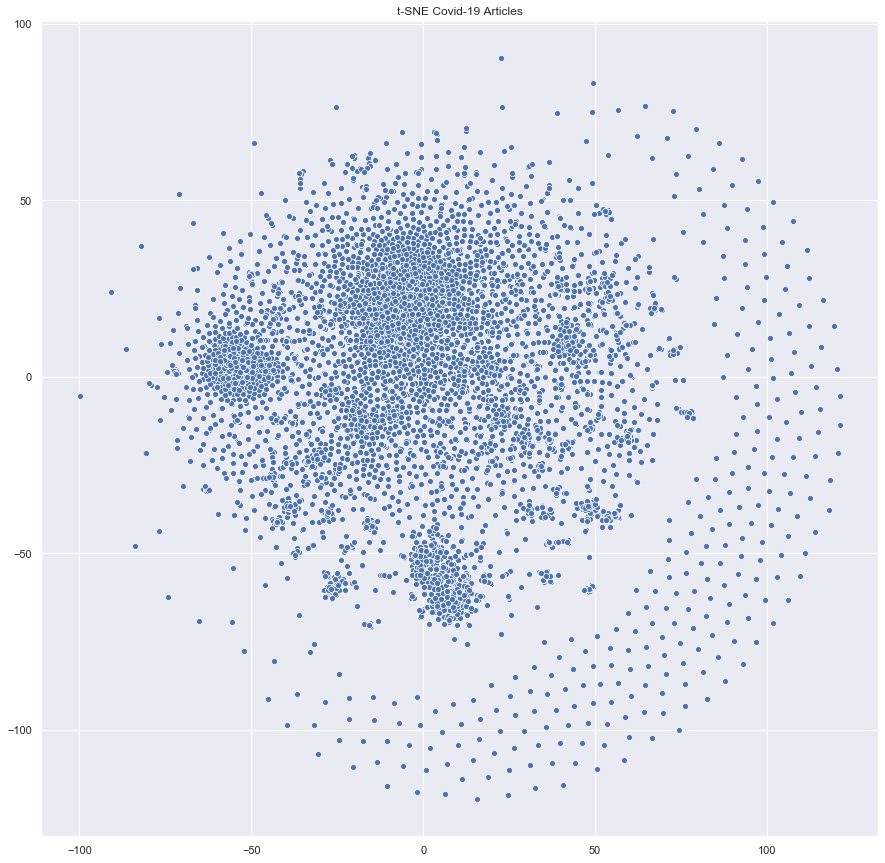

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)

plt.title("t-SNE Covid-19 Articles")
# plt.savefig("plots/t-sne_covid19.png")
plt.show()